<div>
    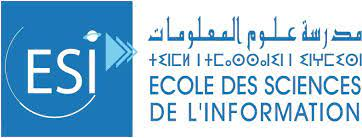
</div>

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;">
<p style="color:orange;font-weight:bold"><u>Réalisé par:</u></p>
<ul >
    <li>ELGHAZI Soufiane</li>
    <li>MAASRI Amine</li>
    <li>Dahmou Youssef</li>
    <li>OUAHIB Yassine</li>
</ul>
    
</div>

<h1 style='color:purple' align='center'>Projet Text mining: News SUM </h1>

<h2 style='color:olive' align='center'>LSTM </h2>

<h2 style='color:olive' align='center'>Plan </h2>

<div style="background-color:white; color:black; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;">
<p style="color:purple;">Étape 2 : Création et évaluation des modèles : LSTM</p><br>

<p style="color:purple;">Étape 3 : Amélioration des performances: Attention layer</p><br>

<p style="color:purple;">Références</p>
 Les liens vers les ressources utilisées et consulté .<br><br>
</div>

<h2 style='color:purple'>Importation des Bibliothèques: </h2>

In [1]:
pip install rouge

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import re
import string
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
from nltk.tokenize import sent_tokenize

from sklearn.model_selection import train_test_split

from rouge import Rouge
from wordcloud import WordCloud

from eventregistry import *
import json

In [4]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth",200)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<h2 style='color:olive' align='center'>Création de modèle LSTM </h2>

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
 on va commencer par l'importation des données nettoyer directement;
</div>

In [16]:
corpus = pd.read_excel("../Data/Final_Data/corpus.xlsx")

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Visualiser la distribution de texte et de résumé:
</div>

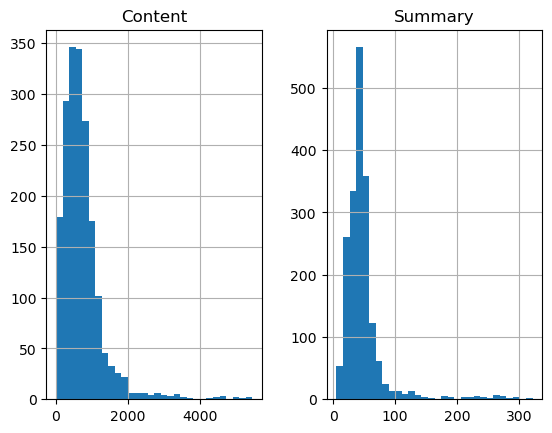

In [17]:
Content_Count = []
Summary_Count = []

for i in corpus['Content_preprocessed']:
      Content_Count.append(len(i.split()))
for i in corpus['Summary_preprocessed']:
      Summary_Count.append(len(i.split()))

length_df = pd.DataFrame({'Content':Content_Count, 'Summary':Summary_Count})
length_df.hist(bins = 30)
plt.show()

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Vérifier le pourcentage de texte qui a entre 0 et 500 mots et de résumé qui est entre 0 et 100 mots
</div>

In [18]:
cnt = 0
for i in corpus['Summary_preprocessed']:
    if len(i.split()) <= 120:
        cnt = cnt + 1
print(cnt / len(corpus['Summary_preprocessed']))

0.95932382461701


In [20]:
cnt = 0
for i in corpus['Content_preprocessed']:
    if len(i.split()) <= 2000:
        cnt = cnt + 1
print(cnt / len(corpus['Content_preprocessed']))

0.971473851030111


<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Définir les limites , 0-40 pour Summary et 0-300 pour Content.
</div>

In [18]:
max_text_len = 2000
max_summary_len = 200

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Enlever les Outliers
</div>

In [19]:
Content_preprocessed_array =np.array(corpus['Content_preprocessed'])
Summary_preprocessed_array=np.array(corpus['Summary_preprocessed'])

short_text=[]
short_summary=[]

for i in range(len(Content_preprocessed_array)):
    if(len(Summary_preprocessed_array[i].split())<=max_summary_len and len(Content_preprocessed_array[i].split())<=max_text_len):
        short_text.append(Content_preprocessed_array[i])
        short_summary.append(Summary_preprocessed_array[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Ajouter Tokens au début et à la fin de résumé:
</div>

In [20]:
df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [74]:
for i in range(3):
    print("Text:",df['text'][i])
    print("\n")
    print("Summary:",df['summary'][i])
    print("\n\n")

Text: new york police are concerned drones could become tools for terrorists and are investigating ways to stop potential attacks until now police have not acknowledged drones as potential weapon but the nypd has now said the technology has advanced enough that someone could use them to carry out an air assault using chemical weapons and firearms police want to develop technology which will allow them to take control of drones as well as scan the skies for them before major events the nypd says drones carrying explosives are the number one threat as they investigate ways to stop attacks deputy chief salvatore dipace left was concerned about an incident last year where drone was landed in front of german chancellor angela merkel and could have took the chancellor and her people out drone which was flown over packed football stadium in manchester england just over week ago resulting in the suspected pilot being arrested they are consulting with the military and members of its counterterr

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Séparer les données d'entraînement et de test
</div>

In [22]:
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.1,random_state=0,shuffle=True) 

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Tokenizer le text afin d'avoir le count de vocab  

</div>

In [23]:
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Calculer le nombre de de mots rares et communes dans le texte . 

</div>

In [24]:
thresh=4
cnt=0
tot_cnt=0
freq=0
tot_freq=0
for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
print("Le pourcentage des mots rares dans le vocabulaire est : ",(cnt/tot_cnt)*100 ," %")
print("Couverture totale des mots rares :",(freq/tot_freq)*100)

Le pourcentage des mots rares dans le vocabulaire est :  70.3549957056971  %
Couverture totale des mots rares : 12.440691801438703


<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Définir le tokenizer avec la plupart des mots communes pour le Texte

</div>

In [25]:
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
convertir les séquences de texte en séquences numériques (integer)
</div>

In [26]:
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Remplissage zéro jusqu'à la longueur maximale
</div>

In [27]:
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

In [28]:
#Longeur de vocabulaire ( +1 pour padding token)
x_voc   =  x_tokenizer.num_words + 1
x_voc

4143

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
preparer le tokenizer pour les résumées sur l'ensemble d'entrainement
</div>

In [29]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Calculer le nombre de de mots rares et communes dans les résumés . 

</div>

In [30]:
thresh=2
cnt=0
tot_cnt=0
freq=0
tot_freq=0
for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
print("Le pourcentage des mots rares dans le vocabulaire est : ",(cnt/tot_cnt)*100 ," %")
print("Couverture totale des mots rares :",(freq/tot_freq)*100)

Le pourcentage des mots rares dans le vocabulaire est :  93.0271299381247  %
Couverture totale des mots rares : 45.992924165513


<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Définir le tokenizer avec la plupart des mots communes pour le résumées

</div>

In [31]:
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
convertir les séquences de texte en séquences numériques (integer)
</div>

In [32]:
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Remplissage zéro jusqu'à la longueur maximale
</div>

In [33]:
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

In [34]:
#size de vocabulaire
y_voc  =   y_tokenizer.num_words +1
y_voc

294

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
la vérification du nombre de mots du jeton de début est égal à la longueur des données d'entrainement
</div>

In [35]:
y_tokenizer.word_counts['sostok'],len(y_tr)

(382, 382)

<div style="background-color:cyan; color:black; font-size:14px; font-family:Verdana; padding:10px;border: 4px solid black;text-align:center">
1- Création de modèle
</div>

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Définir l'architecture de Modèle , encoder et decoder
</div>

In [36]:
from keras import backend as K 
K.clear_session()

latent_dim = 100
embedding_dim=50

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model_lstm = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model_lstm.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 500)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 500, 100)             414300    ['input_1[0][0]']             
                                                                                                  
 lstm (LSTM)                 [(None, 500, 300),           481200    ['embedding[0][0]']           
                              (None, 300),                                                        
                              (None, 300)]                                                        
                                                                                              

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Ploter l'architecture de modèle
</div>

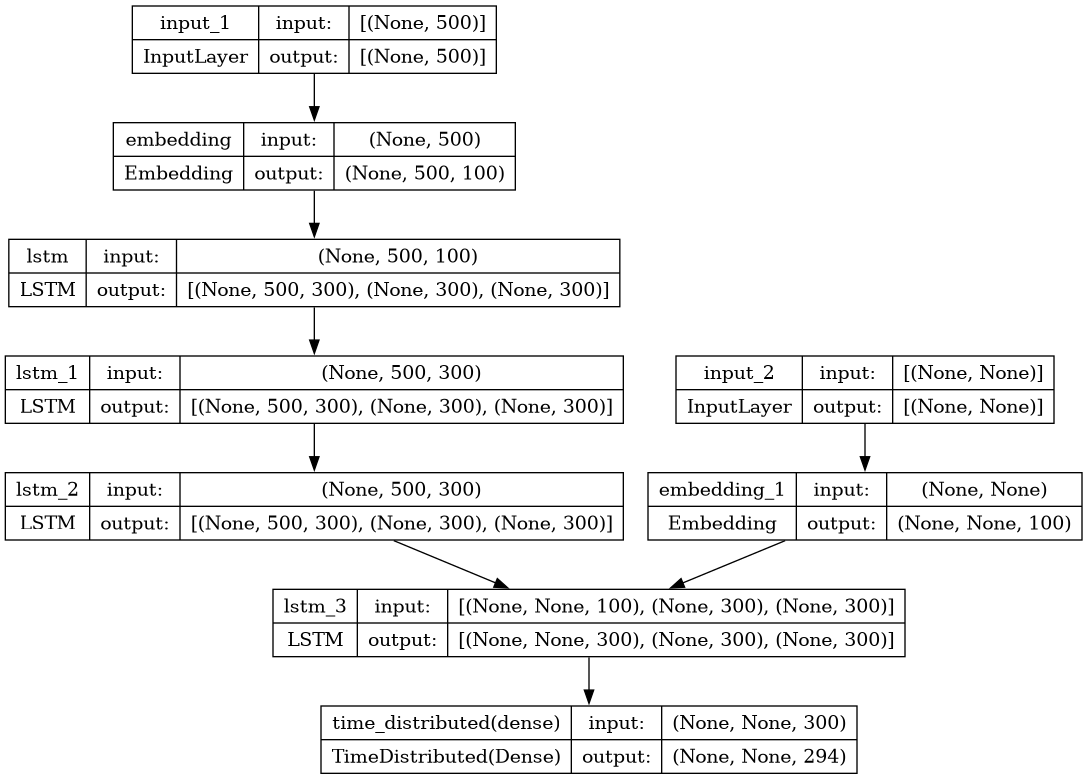

In [37]:
plot_model(model_lstm, show_shapes=True)

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Compiler le modèle
</div>

In [38]:
model_lstm.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

<div style="background-color:cyan; color:black; font-size:14px; font-family:Verdana; padding:10px;border: 4px solid black;text-align:center">
2-Entrainement de modèle
</div>

In [39]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [ ]:
history = model_lstm.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=20,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Enregistrer le modèle
</div>

In [41]:
# serialiser le model en JSON
model_json = model_lstm.to_json()
with open("Models/LSTM.json", "w") as json_file:
    json_file.write(model_json)
# serializer les poids en HDF5
model_lstm.save_weights("Models/LSTM.h5")
print("Saved model to disk")

Saved model to disk


<div style="background-color:cyan; color:black; font-size:14px; font-family:Verdana; padding:10px;border: 4px solid black;text-align:center">
3-Evaluation de modèle
</div>

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Afficher Loss dans le test et train
</div>

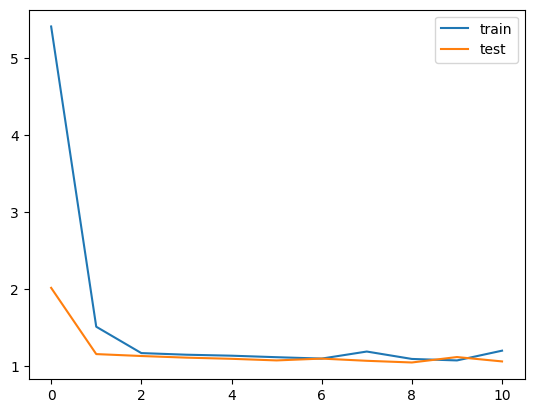

In [43]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
convertir l'index en mot pour le vocabulaire des résumés et des textes 
</div>

In [60]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [65]:
len(reverse_target_word_index)

4202

In [64]:
len(target_word_index)

4202

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Configuration de l'inférence pour l'encodeur et le décodeur
</div>

In [66]:
# Encoder : Encode la séquence d'entrée pour obtenir le vecteur de caractéristiques
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Configuration du décodeur
# Les tenseurs ci-dessous contiendront les états du pas de temps précédent
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))

# Obtenir les embeddings de la séquence du décodeur
dec_emb2 = dec_emb_layer(decoder_inputs)
# Pour prédire le mot suivant dans la séquence, initialiser les états aux états du pas de temps précédent
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# Une couche softmax dense pour générer une distribution de probabilité sur le vocabulaire cible
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Modèle final du décodeur
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Définir une fonction pour l'implémenation de process d'inférence 
</div>

In [ ]:
def decode_sequence(input_seq):
    # Encoder l'entrée pour obtenir les vecteurs d'état.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq)   
    # Générer une séquence cible vide de longueur 1.
    target_seq = np.zeros((1, 1))  
    # Remplir le premier mot de la séquence cible avec le mot de début.
    target_seq[0, 0] = target_word_index['sostok']
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        # Échantillonner un jeton
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token
        # Condition de sortie : atteindre la longueur maximale ou trouver le mot d'arrêt.
        if (sampled_token == 'eostok' or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True
        # Mettre à jour la séquence cible (de longueur 1).
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index
        # Mettre à jour les états internes
        e_h, e_c = h, c
    return decoded_sentence

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
conversion d'une séquence entière en séquence de mots pour les résumés et les textes
</div>

In [68]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Générer des résumées avec le modèle créer
</div>

In [ ]:
for i in range(1,3):
    print("Content:",seq2text(x_tr[i]))
    print("\n")
    print("Original summary:",seq2summary(y_tr[i]))
    print("\n")
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n\n")

In [ ]:
def generate_summary(input_text):
    # Prétraitement du texte d'entrée
    input_text = preprocess_text(input_text)
    input_seq = x_tokenizer.texts_to_sequences([input_text])
    input_seq = pad_sequences(input_seq, maxlen=max_text_len, padding='post')
    # Génération du résumé
    summary = decode_sequence(input_seq)
    # Post-traitement du résumé généré
    generated_summary = seq2summary([summary])
    return generated_summary

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Afficher les scores ROUGE et score BLEU
</div>

In [ ]:
predicted_texts = [generate_summary(text) for text in x_tr]
original_texts = [seq2summary(seq) for seq in y_tr]

# Convertir les textes en listes de tokens
predicted_tokens = [predicted_text.split() for predicted_text in predicted_texts]
original_tokens = [original_text.split() for original_text in original_texts]

# Calculer les scores BLEU
individual_bleu_scores = [sentence_bleu([original], predicted, weights=(1, 0, 0, 0)) for original, predicted in zip(original_tokens, predicted_tokens)]
average_bleu_score = np.mean(individual_bleu_scores)

# Calculer les scores ROUGE
rouge = Rouge()
rouge_scores = rouge.get_scores(predicted_texts, original_texts, avg=True)

# Afficher le score BLEU
print("BLEU Score:", average_bleu_score)

# Afficher les scores ROUGE
print("ROUGE Scores:", rouge_scores)

In [ ]:
plt.bar(rouge_scores.keys(), rouge_scores.values())
plt.title('Scores ROUGE')
plt.ylabel('Score')
plt.show()

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Exemple d'utilisation
</div>

In [ ]:
input_text = "by rebecca english published 19 20 est december 2012 updated 19 21 est december 2012 delighted as she and william undoubtedly are the duchess s pregnancy could not have come at more chaotic time for the royal couple the duke is about to make one of the biggest decisions of his life so far whether to extend his time in the raf or quit to become full time working royal and to make matters worse the couple still won t have permanent home by the time the baby is born early next summer home to be an aerial view of kensington palace flat in the main building will be home to the couple but not until october 2013 kate and william s planned move to their new apartment in kensington palace is now unlikely to take place until october 2013 contractors apartment 1a which used to belong to princess margaret have uncovered which has to be cleared before the couple let alone newborn baby can move in sources close to the also say the apartment which has since been used as offices and exhibition space by historic royal was virtually when it was inspected after their wedding last year when the baby is born kate and are likely to still be living at nottingham cottage but hope to move into margaret former apartment as soon as possible contractors apartment 1a which used to belong to princess margaret have uncovered which has to be cleared before the couple let alone newborn baby can move in palace gardens the statue of queen victoria by her daughter princess louise has recently been up at kensington palace and is looking as good as new it has no kitchen or bathroom and needed total and none of which could be started until the apartment was fully vacated by the charity s staff just few weeks ago at the moment there is just no way their new home will be by the time the baby is born said one this means that when they become parents the couple will still be between their relatively modest rented farmhouse on in north wales and the two bedroom nottingham cottage in the grounds of kensington palace future parents having been married for just 20 months kate is to be mother early next summer inside the palace the king grand which has recently been restored as part of 12 million the restored formal gardens the couple currently have two bedroom nottingham cottage in the grounds of kensington palace if the duchess s health continues to suffer the couple are also likely to face another major domestic william is tied to his base in north wales for at least the next nine months but kate is more than likely to be forced to stay nearly 300 miles away in london alone to be closer to her kate s natural desire to be close to her mother middleton may also mean the duchess is more likely to stay in nottingham cottage it is only 50 miles from her parents 4 home in berkshire and if she stayed in london kate would only be short drive away from the hospital where she has been treated since monday "
generated_summary = generate_summary(input_text)

# Affichage du résultat
print("Texte d'entrée :", input_text)
print("Résumé généré :", generated_summary)

In [4]:
print("Content:",seq2text(x_tr[1]))
print("\n")
print("Original summary:",seq2summary(y_tr[1]))
print("\n")
print("Résumé généré :",decode_sequence(x_tr[1].reshape(1,max_text_len)))
print("\n\n")


Content: by rebecca english published 19 20 est december 2012 updated 19 21 est december 2012 delighted as she and william undoubtedly are the duchess s pregnancy could not have come at more chaotic time for the royal couple the duke is about to make one of the biggest decisions of his life so far whether to extend his time in the raf or quit to become full time working royal and to make matters worse the couple still won t have permanent home by the time the baby is born early next summer home to be an aerial view of kensington palace flat in the main building will be home to the couple but not until october 2013 kate and william s planned move to their new apartment in kensington palace is now unlikely to take place until october 2013 contractors apartment 1a which used to belong to princess margaret have uncovered which has to be cleared before the couple let alone newborn baby can move in sources close to the also say the apartment which has since been used as offices and exhibiti

<h2 style='color:olive' align='center'>Amélioration de modèle LSTM : Attention layer </h2>

<div style="background-color:cyan; color:black; font-size:14px; font-family:Verdana; padding:10px;border: 4px solid black;text-align:center">
1-Création de modèle
</div>

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Définir l'architecture de Modèle , encoder et decoder
</div>

In [ ]:
from keras import backend as K 
K.clear_session()

latent_dim = 100
embedding_dim=50

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model_lstm = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model_lstm.summary() 

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Ploter l'architecture de modèle
</div>

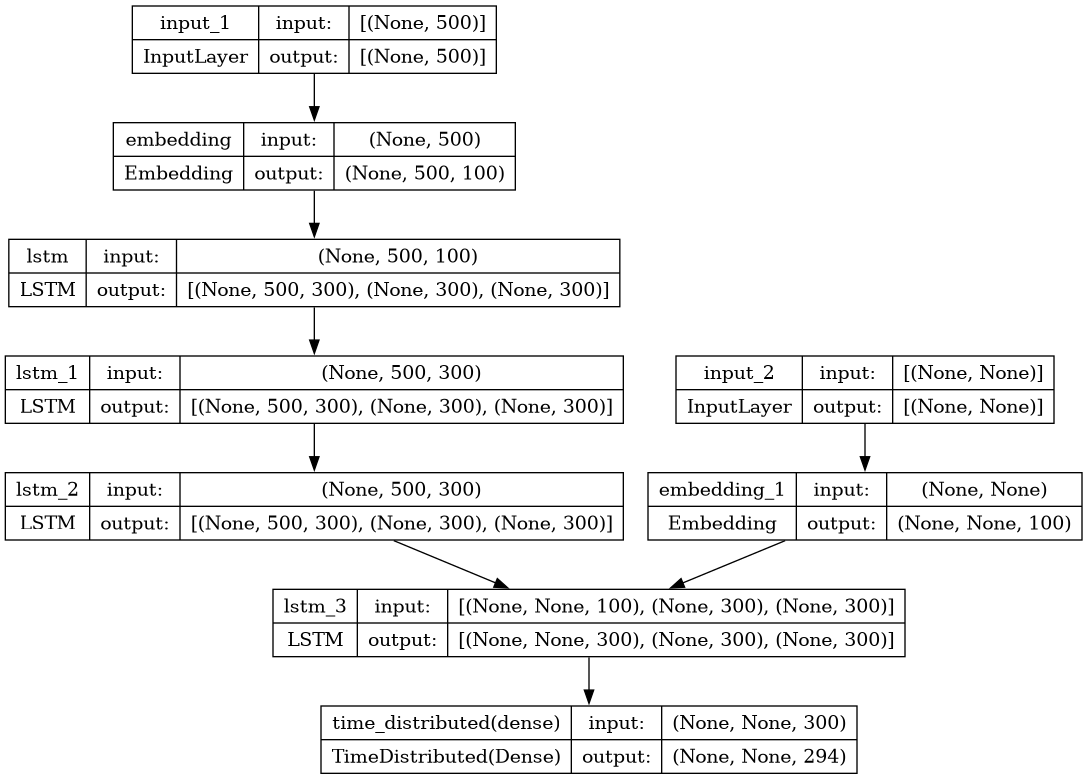

In [37]:
plot_model(model_lstm, show_shapes=True)

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Compiler le modèle
</div>

In [38]:
model_lstm.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

<div style="background-color:cyan; color:black; font-size:14px; font-family:Verdana; padding:10px;border: 4px solid black;text-align:center">
2-Entrainement de modèle
</div>

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

history = model_lstm.fit([x_tr, y_tr[:, :-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:], 
                           epochs=20, callbacks=[es], batch_size=128, 
                           validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]))

<div style="background-color:cyan; color:black; font-size:14px; font-family:Verdana; padding:10px;border: 4px solid black;text-align:center">
3-Evaluation de modèle
</div>

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Afficher Loss dans le test et train
</div>

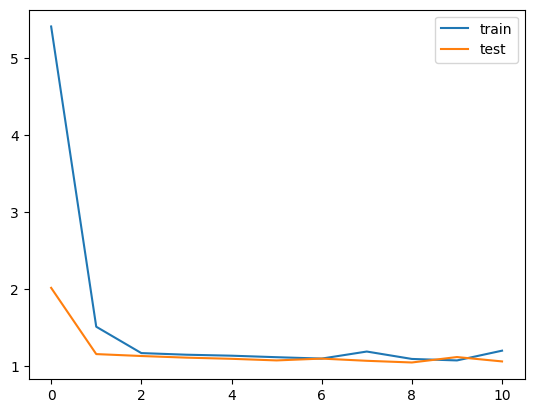

In [43]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Configuration de l'inférence pour l'encodeur et le décodeur
</div>

In [66]:
# Encoder : Encode la séquence d'entrée pour obtenir le vecteur de caractéristiques
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Configuration du décodeur
# Les tenseurs ci-dessous contiendront les états du pas de temps précédent
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))

# Obtenir les embeddings de la séquence du décodeur
dec_emb2 = dec_emb_layer(decoder_inputs)
# Pour prédire le mot suivant dans la séquence, initialiser les états aux états du pas de temps précédent
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# Une couche softmax dense pour générer une distribution de probabilité sur le vocabulaire cible
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Modèle final du décodeur
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Définir une fonction pour l'implémenation de process d'inférence 
</div>

In [ ]:
def decode_sequence(input_seq):
    # Encoder l'entrée pour obtenir les vecteurs d'état.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq)   
    # Générer une séquence cible vide de longueur 1.
    target_seq = np.zeros((1, 1))  
    # Remplir le premier mot de la séquence cible avec le mot de début.
    target_seq[0, 0] = target_word_index['sostok']
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        # Échantillonner un jeton
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token
        # Condition de sortie : atteindre la longueur maximale ou trouver le mot d'arrêt.
        if (sampled_token == 'eostok' or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True
        # Mettre à jour la séquence cible (de longueur 1).
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index
        # Mettre à jour les états internes
        e_h, e_c = h, c
    return decoded_sentence

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
conversion d'une séquence entière en séquence de mots pour les résumés et les textes
</div>

In [68]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Générer des résumées avec le modèle créer
</div>

In [ ]:
for i in range(1,3):
    print("Content:",seq2text(x_tr[i]))
    print("\n")
    print("Original summary:",seq2summary(y_tr[i]))
    print("\n")
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n\n")

In [ ]:
def generate_summary(input_text):
    # Prétraitement du texte d'entrée
    input_text = preprocess_text(input_text)
    input_seq = x_tokenizer.texts_to_sequences([input_text])
    input_seq = pad_sequences(input_seq, maxlen=max_text_len, padding='post')
    # Génération du résumé
    summary = decode_sequence(input_seq)
    # Post-traitement du résumé généré
    generated_summary = seq2summary([summary])
    return generated_summary

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Afficher les scores ROUGE et score BLEU
</div>

In [ ]:
predicted_texts = [generate_summary(text) for text in x_tr]
original_texts = [seq2summary(seq) for seq in y_tr]

# Convertir les textes en listes de tokens
predicted_tokens = [predicted_text.split() for predicted_text in predicted_texts]
original_tokens = [original_text.split() for original_text in original_texts]

# Calculer les scores BLEU
individual_bleu_scores = [sentence_bleu([original], predicted, weights=(1, 0, 0, 0)) for original, predicted in zip(original_tokens, predicted_tokens)]
average_bleu_score = np.mean(individual_bleu_scores)

# Calculer les scores ROUGE
rouge = Rouge()
rouge_scores = rouge.get_scores(predicted_texts, original_texts, avg=True)

# Afficher le score BLEU
print("BLEU Score:", average_bleu_score)

# Afficher les scores ROUGE
print("ROUGE Scores:", rouge_scores)

In [ ]:
plt.bar(rouge_scores.keys(), rouge_scores.values())
plt.title('Scores ROUGE')
plt.ylabel('Score')
plt.show()

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Exemple d'utilisation
</div>

In [ ]:
input_text = "by rebecca english published 19 20 est december 2012 updated 19 21 est december 2012 delighted as she and william undoubtedly are the duchess s pregnancy could not have come at more chaotic time for the royal couple the duke is about to make one of the biggest decisions of his life so far whether to extend his time in the raf or quit to become full time working royal and to make matters worse the couple still won t have permanent home by the time the baby is born early next summer home to be an aerial view of kensington palace flat in the main building will be home to the couple but not until october 2013 kate and william s planned move to their new apartment in kensington palace is now unlikely to take place until october 2013 contractors apartment 1a which used to belong to princess margaret have uncovered which has to be cleared before the couple let alone newborn baby can move in sources close to the also say the apartment which has since been used as offices and exhibition space by historic royal was virtually when it was inspected after their wedding last year when the baby is born kate and are likely to still be living at nottingham cottage but hope to move into margaret former apartment as soon as possible contractors apartment 1a which used to belong to princess margaret have uncovered which has to be cleared before the couple let alone newborn baby can move in palace gardens the statue of queen victoria by her daughter princess louise has recently been up at kensington palace and is looking as good as new it has no kitchen or bathroom and needed total and none of which could be started until the apartment was fully vacated by the charity s staff just few weeks ago at the moment there is just no way their new home will be by the time the baby is born said one this means that when they become parents the couple will still be between their relatively modest rented farmhouse on in north wales and the two bedroom nottingham cottage in the grounds of kensington palace future parents having been married for just 20 months kate is to be mother early next summer inside the palace the king grand which has recently been restored as part of 12 million the restored formal gardens the couple currently have two bedroom nottingham cottage in the grounds of kensington palace if the duchess s health continues to suffer the couple are also likely to face another major domestic william is tied to his base in north wales for at least the next nine months but kate is more than likely to be forced to stay nearly 300 miles away in london alone to be closer to her kate s natural desire to be close to her mother middleton may also mean the duchess is more likely to stay in nottingham cottage it is only 50 miles from her parents 4 home in berkshire and if she stayed in london kate would only be short drive away from the hospital where she has been treated since monday "
generated_summary = generate_summary(input_text)

# Affichage du résultat
print("Texte d'entrée :", input_text)
print("Résumé généré :", generated_summary)

In [4]:
print("Content:",seq2text(x_tr[1]))
print("\n")
print("Original summary:",seq2summary(y_tr[1]))
print("\n")
print("Résumé généré :",decode_sequence(x_tr[1].reshape(1,max_text_len)))
print("\n\n")


Content: by rebecca english published 19 20 est december 2012 updated 19 21 est december 2012 delighted as she and william undoubtedly are the duchess s pregnancy could not have come at more chaotic time for the royal couple the duke is about to make one of the biggest decisions of his life so far whether to extend his time in the raf or quit to become full time working royal and to make matters worse the couple still won t have permanent home by the time the baby is born early next summer home to be an aerial view of kensington palace flat in the main building will be home to the couple but not until october 2013 kate and william s planned move to their new apartment in kensington palace is now unlikely to take place until october 2013 contractors apartment 1a which used to belong to princess margaret have uncovered which has to be cleared before the couple let alone newborn baby can move in sources close to the also say the apartment which has since been used as offices and exhibiti

<h2 style='color:olive' align='center'>Références: </h2>

---
<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
<ul>
<li><a href="https://blog.research.google/2016/08/text-summarization-with-tensorflow.html" style="color:white;"> Ressource 1</a></li>
<li><a href="https://en.wikipedia.org/wiki/Tf%E2%80%93idf" style="color:white;"> Ressource 2</a></li>
<li><a href="https://www.kaggle.com/datasets/sbhatti/news-summarization/data" style="color:white;"> Ressource 3 </a></li>
<li><a href="https://radimrehurek.com/gensim/models/word2vec.html" style="color:white;"> Ressource4 </a></li>
    
</ul>
</div>

---

<h2 style='color:olive' align='center'>END </h2>